# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as respostas devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
black_friday = pd.read_csv("black_friday.csv")

## Inicie sua análise a partir daqui

### Entendendo o _data set_

In [6]:
black_friday.shape

(537577, 12)

In [7]:
black_friday.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

O _data set_ conta com mais de 500 mil registros de transações de compras e 12 variáveis com atributos sobre elas. Cada observação corresponde a um produto comprado e as variáveis dizem respeito aos produtos (`Product_Category_X`, `Purchase`) e aos clientes (`Gender`, `Age`, `Occupation`, `Marital_Status`, `City Category`, `Stay_In_Current_City_Years`).

Os usuários, isto é, os clientes, são identificados por um código numérico na variável `User_ID` e os produtos são identificados por um código alfanumérico em `Product_ID`.

In [8]:
black_friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


É um conjunto de dados bem completo. As únicas variáveis contendo missing values são as opções de categoria 2 e 3.

In [9]:
black_friday.isna().sum() / len(black_friday)

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.310627
Product_Category_3            0.694410
Purchase                      0.000000
dtype: float64

Todos os produtos vendidos são de uma categoria, mas aproximadamente dois terços são categorizados em duas classes e um terço são assinalados a três categorias.

## Conhecendo os clientes

Como vimos, a amostra é composta por mais de 500 mil transações. Cada linha corresponde a um item comprado por um cliente, que pode ser comprador de mais de um item.

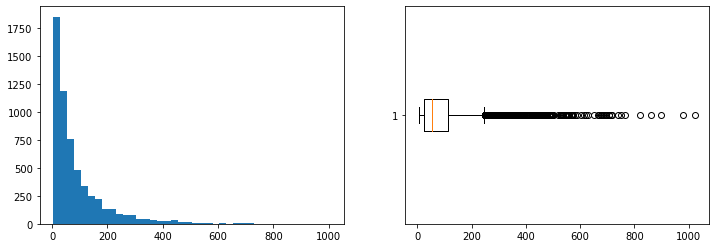

In [3]:
customer_count = black_friday["User_ID"].value_counts()
mini = min(customer_count)
maxi = max(customer_count)

fig = plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(customer_count, bins=np.arange(mini, maxi, 25))

plt.subplot(1, 2, 2)
plt.boxplot(customer_count, vert=False)

plt.show()

Em uma loja de varejo, geralmente o comprador é o usuário final do produto, que compra uma ou poucas unidades de itens. Mas o que vemos é que um cliente que comprou 100 unidades de produtos, por exemplo, não representa uma ocorrência inusual.

Agora vejamos as estatísticas da distribuição em mais detalhes:

In [173]:
customer_count.describe()

count    5891.000000
mean       91.253947
std       105.929800
min         5.000000
25%        25.000000
50%        53.000000
75%       114.000000
max      1025.000000
Name: User_ID, dtype: float64

Realmente. Os clientes que menos compraram adquiriram 5 itens e a mediana é 53. Isso não se parece com a dinâmica de compras em uma loja de varejo.

É difícil dizer muito em função da falta de informação sobre os tipos de produtos comercializados (já que a descrição dos códigos que os identifica não estão disopníveis), mas os dados apontam evidências de que durante a Black Friday os clientes compram no atacado.

In [4]:
customer_purchase = black_friday.groupby("User_ID")["Purchase"].sum()

customers = [customer_count.index, customer_count, customer_purchase]
customers = pd.DataFrame(customers, index = ["User_ID", "Itens", "Purchase_Total"])
customers = customers.T.sort_values("User_ID")

# customers["Purchase_Mean"] = 

customers.head()

,User_ID,Itens,Purchase_Total
3766,1000001,34,434293
2199,1000002,76,1242328
4082,1000003,29,204211
5584,1000004,13,590876
1599,1000005,106,248400


In [6]:
# customers.plot.scatter("Itens", "Total_Purchase")

In [8]:
type(customer_purchase)

pandas.core.series.Series

In [7]:
# customers = pd.DataFrame([customer_count.index, customer_count, customer_purchase],
#                          columns = ["User_ID", "Itens", "Total_Purchase"])

# customers

## Respondendo as questões

__Questão 1__:

In [10]:
black_friday.shape

(537577, 12)

__Questão 2__:

In [11]:
indexAge = black_friday["Age"]  == "26-35"
indexGender = black_friday["Gender"] == "F"
index = black_friday[indexAge & indexGender]
len(index)

49348

__Questão 3:__

In [12]:
black_friday["User_ID"].nunique()

5891

__Questão 4:__

In [13]:
black_friday.dtypes.nunique()

3

__Questão 5:__

In [14]:
cols_n = len(black_friday.columns)
cols_nan = black_friday.isna().any().sum()
cols_nan / cols_n

0.16666666666666666

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [14]:
def q1():
    return black_friday.shape

In [15]:
q1()

(537577, 12)

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [16]:
def q2():
    age = black_friday["Age"]
    gender = black_friday["Gender"]
    indexed = (age == "26-35") & (gender == "F")
    return indexed.sum().item()

In [17]:
q2()

49348

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [18]:
def q3():
    return black_friday["User_ID"].nunique()

In [19]:
q3()

5891

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [2]:
def q4():
    return black_friday.dtypes.nunique()

In [15]:
q4()

3

## Questão 5

Qual porcentagem das colunas possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [29]:
def q5():
    count_nan = black_friday.isnull().sum()
    count_rows = len(black_friday)
    result = (count_nan / count_rows).sort_values(ascending=False)[0]
    return result.item()

In [30]:
q5()

0.6944102891306734

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [40]:
def q6():
    return black_friday.isna().sum().max().item()

In [41]:
q6()

373299

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [42]:
def q7():
    counts = black_friday["Product_Category_3"].value_counts()
    return counts.idxmax()

In [43]:
q7()

16.0

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

$norm_i = \dfrac{x_i - x_{\min}}{x_{\max} - x_{\min}}$

In [406]:
def q8():
    x = black_friday["Purchase"]
    normalized = (x - x.min()) / (x.max() - x.min())
    return normalized.mean().item()

In [407]:
q8()

0.3847939036269795

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem na variável `Purchase` após sua padronização? Responda como um único escalar.

$stand_i = \dfrac{x_i - \mu}{\sigma}$ 

In [36]:
def q9():
    x = black_friday["Purchase"]
    standardized = (x - x.mean()) / x.std()
    indexed = (standardized >= -1) & (standardized <= 1)
    return indexed.sum().item()

In [37]:
q9()

348631

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [408]:
def q10():
    na_cat2 = black_friday[black_friday["Product_Category_2"].isna()]
    na_cat3 = na_cat2["Product_Category_3"].isna().sum()
    return (len(na_cat2) == na_cat3).item()

In [409]:
q10()

True